In [1]:
%pylab inline
%load_ext autoreload 
%autoreload 2


Populating the interactive namespace from numpy and matplotlib


In [2]:
from distribution.duration_distribution import PoissonDistribution
from distribution.num_distribution import UniformDistribution
from distribution.order_distribution import MarkovDistribution
from distribution.weight_distribution import UniformDistribution as WUniformDistribution
from embedding_generator import GaussEGenerator
from sequence_generator import SGenerator

## Test num_distribution

In [3]:
uniform_distribution = UniformDistribution(start=2)
num = uniform_distribution.sample()
print(num)

4


## Test weight_distribution

In [4]:
weight_distribution = WUniformDistribution()
weights = weight_distribution.sample(num)
weights

array([0.30365848, 0.05782533, 0.31777581, 0.32074038])

## Test order_distribution

In [5]:
order_distribution = MarkovDistribution()
orders = order_distribution.sample(10, weights)
orders

array([1, 3, 0, 2, 1, 0, 3, 0, 2, 3])

## Test duration_distribution

In [6]:
duration_distribution = PoissonDistribution(5)
durations = duration_distribution.sample(len(orders))
durations

array([9, 4, 5, 4, 7, 4, 6, 5, 2, 5])

## Test embedding generator

In [7]:
embedding_generator = GaussEGenerator()
embs = embedding_generator.generate_points([5,10,20])

In [8]:
[len(emb) for emb in embs]

[5, 10, 20]

In [9]:
x0,y0 = zip(*(embs[0]))
x1,y1 = zip(*(embs[1]))
x2,y2 = zip(*(embs[2]))

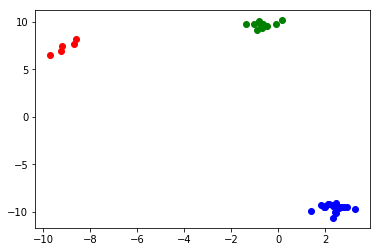

In [10]:
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'go')
plt.plot(x2,y2,'bo')

## Test sequence generator

In [11]:
sq_generator = SGenerator(30, uniform_distribution, weight_distribution, 
                          duration_distribution, order_distribution, embedding_generator)

In [12]:
example = sq_generator.sample_one(10)

In [13]:
points = zip(*(example['X']))

In [14]:
labels = example['y']

In [15]:
x,y = list(points)
x = list(x)
y = list(y)

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
labels

array([1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1])

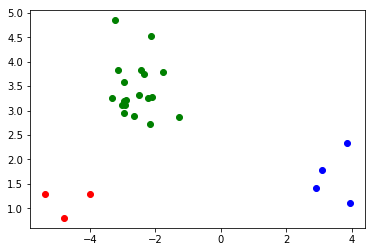

In [18]:
plt.plot(x[labels==3],y[labels==3],'ro')
plt.plot(x[labels==1],y[labels==1],'go')
plt.plot(x[labels==2],y[labels==2],'bo')

# Train data

Set random_seed to 42 for training data generator

In [19]:
sq_generator = SGenerator(30, uniform_distribution, weight_distribution, 
                          duration_distribution, order_distribution, embedding_generator, random_seed=42)

In [20]:
for one_batch in sq_generator.generator(30,64):
    break

In [21]:
one_batch['X'].shape

(64, 30, 2)

In [22]:
one_batch['y'].shape

(64, 30)

# Test data

Set random_seed to 10 for test data set

In [23]:
sq_generator = SGenerator(30, uniform_distribution, weight_distribution, 
                          duration_distribution, order_distribution, embedding_generator, random_seed=10)

In [24]:
X_test = []
y_test = []
g = sq_generator.generator(30,64)
for i in range(10):
    one_batch = next(g)
    X_test.append(one_batch['X'])
    y_test.append(one_batch['y'])

In [25]:
X_test = np.vstack(X_test)

In [26]:
y_test = np.vstack(y_test)